<u> Objectives </u>
- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis and identify the attributes that most affect the charges
- Develop single variable and multi variable Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [88]:
#1. Importing dataset
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
headers = ['Age','Gender','BMI','No.Children', 'Smoker','Region','Charges']
df = pd.read_csv(filepath, header=None)
df.columns = headers
df.replace('?', np.nan, inplace = True)
df.head(10)

,Age,Gender,BMI,No.Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

In [89]:
#2. Data Wrangling
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2768 non-null   object 
 1   Gender       2772 non-null   int64  
 2   BMI          2772 non-null   float64
 3   No.Children  2772 non-null   int64  
 4   Smoker       2765 non-null   object 
 5   Region       2772 non-null   int64  
 6   Charges      2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [90]:
#gives the locations 
index = np.where(df.isna())
index


(array([   5,   28,   72,  122,  176,  234,  242,  324, 1836, 2180, 2664]),
 array([4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0]))

In [91]:
mean_age = df['Age'].astype('float').mean()
df['Age'].replace(np.nan, mean_age, inplace = True)

print(df['Smoker'].value_counts())
df['Smoker'].replace(np.nan, df['Smoker'].mode()[0] , inplace = True)





Smoker
0    2201
1     564
Name: count, dtype: int64


In [97]:
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")
df[['Charges']] = df[['Charges']].round(2) 
#Alternatve, df[["charges"]] = np.round(df[["charges"]],2)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2772 non-null   int64  
 1   Gender       2772 non-null   int64  
 2   BMI          2772 non-null   float64
 3   No.Children  2772 non-null   int64  
 4   Smoker       2772 non-null   int64  
 5   Region       2772 non-null   int64  
 6   Charges      2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [98]:
df.head(10)

,Age,Gender,BMI,No.Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
5,31,1,25.740,0,0,4,3756.62
6,46,1,33.440,1,0,4,8240.59
7,37,1,27.740,3,0,1,7281.51
8,37,2,29.830,2,0,2,6406.41
9,60,1,25.840,0,0,1,28923.14


(0.0, 66902.85800000001)

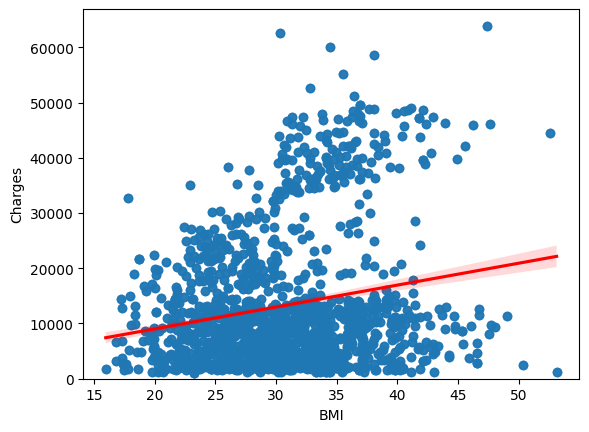

In [108]:
#3. Exploratory Data Analysis
sns.regplot(x='BMI',y='Charges', data=df, line_kws={"color": "red"})
plt.ylim(0,)


/tmp/ipykernel_8845/2132942252.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['Smoker','Non-Smoker'])


[Text(0, 0, 'Smoker'), Text(1, 0, 'Non-Smoker')]

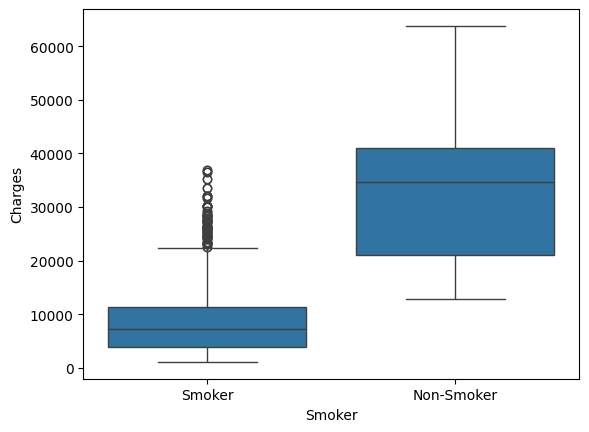

In [114]:
plot = sns.boxplot(x='Smoker', y='Charges', data=df)
plot.set_xticklabels(['Smoker','Non-Smoker']) #alternative can use map: df[].map({0: 'Non-Smoker', 1: 'Smoker'})

In [112]:
df.corr()

,Age,Gender,BMI,No.Children,Smoker,Region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No.Children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [121]:
#4. Model Development
lro = LinearRegression()
lro.fit(X=df[['Smoker']], y=df[['Charges']])
lro.score(X=df[['Smoker']], y=df[['Charges']])

0.6221791733924185

In [122]:
#Include multivariables for the fit, which led to a high determination coefficient R^2
y_data = df['Charges']
x_data=df.drop('Charges',axis=1)

In [124]:
lro.fit(x_data, y_data)
lro.score(x_data, y_data)

0.7504083820289634

In [142]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(x_data, y_data)
ypipe = pipe.predict(x_data)
print(r2_score(y_data,ypipe))
#uses x_data as the independent, then compares the prediction to the true y_data 
print(pipe.score(x_data,y_data))

0.8450574066597584
0.8450574066597584


In [131]:
#5. Model Refinement
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

In [145]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.6760807731582406

In [149]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
ridge.fit(x_train_pr, y_train)
y_hat = ridge.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608149
